In [4]:
import pyforest
import requests
from requests import get
from bs4 import BeautifulSoup
from time import sleep
from random import randint
from warnings import warn
import numpy as np
import pandas as pd

pyforest.lazy_imports()

['import re',
 'from sklearn.model_selection import train_test_split',
 'import bokeh',
 'from sklearn.cluster import KMeans',
 'from sklearn.model_selection import KFold',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import altair as alt',
 'from sklearn.preprocessing import RobustScaler',
 'from scipy import signal as sg',
 'import datetime as dt',
 'from sklearn import svm',
 'import sys',
 'import glob',
 'from sklearn.model_selection import cross_val_score',
 'import textblob',
 'import xgboost as xgb',
 'from xlrd import open_workbook',
 'import spacy',
 'import statistics',
 'from sklearn.preprocessing import StandardScaler',
 'import awswrangler as wr',
 'from sklearn.impute import SimpleImputer',
 'import tqdm',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import dash',
 'import plotly.express as px',
 'from pathlib import Path',
 'fr

In [5]:

pages = np.arange(1, 9951, 50)
headers = {'Accept-Language': 'en-US,en;q=0.8'}


titles = []
years = []
ratings = []
genres = []
runtimes = []
imdb_ratings = []
imdb_ratings_standardized = []
metascores = []
votes = []

for page in pages:
  
  response = get("https://www.imdb.com/search/title?genres=sci-fi&"
                  + "start="
                  + str(page)
                  + "&explore=title_type,genres&ref_=adv_prv", headers=headers)
  
  sleep(randint(8,15))

  if response.status_code != 200:
    warn('Request: {}; Status code: {}'.format(requests, response.status_code))

  page_html = BeautifulSoup(response.text, 'html.parser')
      
  movie_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')
  
  for container in movie_containers:

    if container.find('span', class_ = 'lister-item-index unbold text-primary') is not None:
      title = container.h3.a.text
      titles.append(title)
    else:
      titles.append("No title")

    if container.h3.find('span', class_= 'lister-item-year text-muted unbold') is not None:
      year = container.h3.find('span', class_= 'lister-item-year text-muted unbold').text
      years.append(year)
    else:
      years.append(None)

    if container.p.find('span', class_ = 'certificate') is not None:
      rating = container.p.find('span', class_= 'certificate').text
      ratings.append(rating)

    else:
      ratings.append("")

    if container.p.find('span', class_ = 'genre') is not None:
      genre = container.p.find('span', class_ = 'genre').text.replace("\n", "").rstrip().split(',') # remove the whitespace character, strip, and split to create an array of genres
      genres.append(genre)
    else:
      genres.append("")

    if container.p.find('span', class_ = 'runtime') is not None:
      time = int(container.p.find('span', class_ = 'runtime').text.replace(" min", "")) # remove the minute word from the runtime and make it an integer
      runtimes.append(time)
    else:
      runtimes.append(None)

    try:
      imdb = float(container.strong.text) 
      imdb_ratings.append(imdb)
    except:
      imdb_ratings.append(None)

    try:
      m_score = int(container.find('span', class_ = 'metascore').text)
      metascores.append(m_score)
    except:
      metascores.append(None)

    try:
      vote = int(container.find('span', attrs = {'name':'nv'})['data-value'])
      votes.append(vote)
    except:
      votes.append(None)


In [6]:
print(page_html)


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Sci-Fi
(Sorted by Popularity Ascending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/?genres=sci-fi&amp;start=9901" rel="canonical"/>
<meta content="http://www.imdb.com/search/title/?genres=sci-fi&amp;start=

In [7]:
print(f" Titles: {len(titles)} \n Years: {len(years)}\n Ratings: {len(ratings)}\n Genres: {len(genres)}\n Runtimes: {len(runtimes)}\n Imdb_ratings: {len(imdb_ratings)}\n Imdb_ratings_standardized: {len(imdb_ratings_standardized)}\n Metascores: {len(metascores)}\n Votes: {len(votes)}")

 Titles: 9950 
 Years: 9950
 Ratings: 9950
 Genres: 9950
 Runtimes: 9950
 Imdb_ratings: 9950
 Imdb_ratings_standardized: 0
 Metascores: 9950
 Votes: 9950


In [83]:
sci_fi_df = pd.DataFrame({'movie': titles,
                    'year': years,
                    'rating': ratings,
                    'genre': genres,
                    'runtime_min': runtimes,
                    'imdb': imdb_ratings,
                    'metascore': metascores,
                    'votes': votes}
                    )
sci_fi_df['year'] = sci_fi_df['year'].map(lambda x: x.lstrip("(I)(V ").rstrip(')'))
sci_fi_df['year'] = sci_fi_df['year'].str[0:4]
sci_fi_df['metascore'] = sci_fi_df['metascore'] / 10
sci_fi_df

,movie,year,rating,genre,runtime_min,imdb,metascore,votes
0,Andor,2022,TV-14,"[Action, Adventure, Drama]",40.0,8.1,NaN,29557.0
1,She-Hulk: Attorney at Law,2022,TV-14,"[Action, Adventure, Comedy]",35.0,5.1,NaN,136810.0
2,The Super Mario Bros. Movie,2023,,"[Animation, Adventure, Comedy]",NaN,NaN,NaN,NaN
3,Black Panther: Wakanda Forever,2022,,"[Action, Adventure, Drama]",161.0,NaN,NaN,NaN
4,The Munsters,2022,PG,"[Comedy, Family, Fantasy]",109.0,4.6,5.7,7055.0
...,...,...,...,...,...,...,...,...
9945,Star Wars: Dark Forces,1995,T,"[Action, Adventure, Sci-Fi]",NaN,7.9,NaN,1044.0
9946,Invisible Woman,,,"[Drama, Horror, Sci-Fi]",NaN,NaN,NaN,NaN
9947,TigerSharks,1987,,"[Animation, Action, Adventure]",12.0,7.3,NaN,101.0
9948,Maybe Someday,2017,,"[Comedy, Drama, Fantasy]",108.0,8.1,NaN,39.0


In [84]:
sci_fi_df['year'].unique()

array(['2022', '2023', '2011', '2013', '2017', '2016', '2019', '2009',
       '2005', '2021', '2015', '2024', '1993', '2004', '2020', '2018',
       '1989', '2014', '1987', '2001', '2010', '1997', '1984', '1979',
       '2008', '2012', '1985', '1982', '1966', '1977', '2006', '1971',
       '1999', '2002', '1986', '1995', '2025', '1927', '1998', '1959',
       '2007', '2000', '1996', '1991', '1968', '', '1956', '1963', '1980',
       '1983', '1988', '1992', '1973', '1931', '2003', '1990', '1978',
       '1974', '1981', '1994', '1935', '1965', '1951', '1954', '1975',
       '1933', '1976', '1958', '1961', '1970', '1948', '1953', '1972',
       '1969', '1960', '1964', '1967', '1952', '1957', '2028', 'TV M',
       '1939', 'ideo', '1962', '1932', '1941', '1902', '2026', '1943',
       '1955', '1936', '1944', '1945', '1942', '1940', '1920', 'XVII',
       '1946', '1925', '1949', '1916', '1950', '1924', '1934', '1910',
       'XI', 'XIV', '1929', '1938', 'XII)', '2027', 'XV', '1912', '1904',

In [85]:
sci_fi_df.loc[sci_fi_df['year'] == "XII)"]

,movie,year,rating,genre,runtime_min,imdb,metascore,votes
5633,Muse,XII),,"[Drama, Fantasy, Horror]",95.0,5.2,NaN,409.0


In [86]:
sci_fi_df.loc[9928]

movie          Full Metal Panic! Invisible Victory
year                                          2018
rating                                            
genre                [Animation,  Action,  Comedy]
runtime_min                                   24.0
imdb                                           7.5
metascore                                      NaN
votes                                        394.0
Name: 9928, dtype: object

In [87]:
# Driping 'year' = ideo, XI, XIV, XII, TV M, XVII, XII))
sci_fi_df = sci_fi_df.drop(labels=[6028, 4875, 4993, 3041, 5676, 1514, 4248, 6076, 8106, 8533, 9346, 1657, 5235, 6393, 7890, 7969, 8229, 9242, 5626, 5625, 5633, 5624], axis=0)

In [88]:
sci_fi_df['year'].unique()    

array(['2022', '2023', '2011', '2013', '2017', '2016', '2019', '2009',
       '2005', '2021', '2015', '2024', '1993', '2004', '2020', '2018',
       '1989', '2014', '1987', '2001', '2010', '1997', '1984', '1979',
       '2008', '2012', '1985', '1982', '1966', '1977', '2006', '1971',
       '1999', '2002', '1986', '1995', '2025', '1927', '1998', '1959',
       '2007', '2000', '1996', '1991', '1968', '', '1956', '1963', '1980',
       '1983', '1988', '1992', '1973', '1931', '2003', '1990', '1978',
       '1974', '1981', '1994', '1935', '1965', '1951', '1954', '1975',
       '1933', '1976', '1958', '1961', '1970', '1948', '1953', '1972',
       '1969', '1960', '1964', '1967', '1952', '1957', '2028', '1939',
       '1962', '1932', '1941', '1902', '2026', '1943', '1955', '1936',
       '1944', '1945', '1942', '1940', '1920', '1946', '1925', '1949',
       '1916', '1950', '1924', '1934', '1910', '1929', '1938', '2027',
       '1912', '1904', '1930', '1928', '1919', '1937', '1947', '1918'],
 

In [89]:
sci_fi_df.loc[:, 'year'] = pd.to_numeric(sci_fi_df['year'])

In [90]:
sci_fi_df['rating'].unique()

array(['TV-14', '', 'PG', 'TV-MA', 'PG-13', 'R', 'TV-PG', 'Not Rated',
       'G', 'TV-Y7', 'M', '18', 'TV-Y7-FV', 'Passed', 'TV-G', '12',
       'Unrated', '14', 'Approved', 'TV-Y', 'T', 'GP', 'NC-17', 'E10+',
       '16', 'AO', 'Livre', 'X', 'E', 'TV-13', '10', 'K-A', 'M/PG',
       'MA-13', 'Open', 'GA', 'MA-17'], dtype=object)

In [91]:
# '' - empty
# NR - [Unrated, , Not Rated]
# G - General audiences [G, TV-G, TV-Y7-FV, TV-Y7, TV-Y, Livre, 10, Passed, Approved, E, K-A, GA]
# PG - Parental Guidance Suggested [PG, GP, TV-PG, 12, E10+, M/PG, E10+]
# PG-13 - Parents Strongly Cautioned - 13-17 [PG-13, M, TV-14, TV-13, T, Open]
# R -Restricted 17 w accompanying  [R, 16, MA-17]
# NC-17 – Adults Only [NC-17, X, TV-MA, 18, A, AO]

In [92]:
#sci_fi_df.loc[sci_fi_df['rating'] == 'NR']
sci_fi_df['rating'] = sci_fi_df['rating'].replace(['Unrated', 'Not Rated'], 'NR')
sci_fi_df['rating'] = sci_fi_df['rating'].replace(['TV-G', 'TV-Y7', 'FV', 'TV-Y7', 'TV-Y', 'Livre', '10', 'Passed', 'Approved', 'E', 'K-A', 'GA', 'TV-Y7-FV'], 'G')
sci_fi_df['rating'] = sci_fi_df['rating'].replace(['GP', 'TV-PG', '12', 'E10+', 'M/PG', 'E10+'], 'PG')
sci_fi_df['rating'] = sci_fi_df['rating'].replace(['M', 'TV-14', 'TV-13', 'T', 'Open', '14', 'MA-13'], 'PG-13')
sci_fi_df['rating'] = sci_fi_df['rating'].replace(['16', 'MA-17'], 'R')
sci_fi_df['rating'] = sci_fi_df['rating'].replace(['X', 'TV-MA', '18', 'A', 'AO'], 'NC-17')

In [93]:
sci_fi_df['rating'].unique()

array(['PG-13', '', 'PG', 'NC-17', 'R', 'NR', 'G'], dtype=object)

In [94]:
sci_fi_df.head(50)

,movie,year,rating,genre,runtime_min,imdb,metascore,votes
0,Andor,2022.0,PG-13,"[Action, Adventure, Drama]",40.0,8.1,NaN,29557.0
1,She-Hulk: Attorney at Law,2022.0,PG-13,"[Action, Adventure, Comedy]",35.0,5.1,NaN,136810.0
2,The Super Mario Bros. Movie,2023.0,,"[Animation, Adventure, Comedy]",NaN,NaN,NaN,NaN
3,Black Panther: Wakanda Forever,2022.0,,"[Action, Adventure, Drama]",161.0,NaN,NaN,NaN
4,The Munsters,2022.0,PG,"[Comedy, Family, Fantasy]",109.0,4.6,5.7,7055.0
5,American Horror Story,2011.0,NC-17,"[Drama, Horror, Sci-Fi]",60.0,8.0,NaN,314949.0
6,Rick and Morty,2013.0,NC-17,"[Animation, Adventure, Comedy]",23.0,9.2,NaN,508660.0
7,The Handmaid's Tale,2017.0,NC-17,"[Drama, Sci-Fi, Thriller]",60.0,8.4,NaN,229684.0
8,Stranger Things,2016.0,PG-13,"[Drama, Fantasy, Horror]",51.0,8.7,NaN,1159916.0
9,Vesper,2022.0,,"[Adventure, Drama, Sci-Fi]",114.0,6.1,7.0,8266.0


In [95]:
sci_fi_df['genre'].isnull().sum()

0

In [96]:
sci_fi_df.shape[0]

9928

In [97]:
sci_fi_df.reset_index(inplace=True)

In [98]:
genre1 = []

for i in range(sci_fi_df.shape[0]):
    genre1.append(sci_fi_df['genre'][i][0])
    
#print(genre1)

In [99]:
sci_fi_df['first_genre'] = genre1

In [100]:
sci_fi_df.head()

,index,movie,year,rating,genre,runtime_min,imdb,metascore,votes,first_genre
0,0,Andor,2022.0,PG-13,"[Action, Adventure, Drama]",40.0,8.1,NaN,29557.0,Action
1,1,She-Hulk: Attorney at Law,2022.0,PG-13,"[Action, Adventure, Comedy]",35.0,5.1,NaN,136810.0,Action
2,2,The Super Mario Bros. Movie,2023.0,,"[Animation, Adventure, Comedy]",NaN,NaN,NaN,NaN,Animation
3,3,Black Panther: Wakanda Forever,2022.0,,"[Action, Adventure, Drama]",161.0,NaN,NaN,NaN,Action
4,4,The Munsters,2022.0,PG,"[Comedy, Family, Fantasy]",109.0,4.6,5.7,7055.0,Comedy


In [101]:
sci_fi_df.tail()

,index,movie,year,rating,genre,runtime_min,imdb,metascore,votes,first_genre
9923,9945,Star Wars: Dark Forces,1995.0,PG-13,"[Action, Adventure, Sci-Fi]",NaN,7.9,NaN,1044.0,Action
9924,9946,Invisible Woman,NaN,,"[Drama, Horror, Sci-Fi]",NaN,NaN,NaN,NaN,Drama
9925,9947,TigerSharks,1987.0,,"[Animation, Action, Adventure]",12.0,7.3,NaN,101.0,Animation
9926,9948,Maybe Someday,2017.0,,"[Comedy, Drama, Fantasy]",108.0,8.1,NaN,39.0,Comedy
9927,9949,DC Showcase: Adam Strange,2020.0,,"[Animation, Short, Action]",16.0,6.3,NaN,1152.0,Animation


In [102]:
len(genre1)

9928

In [103]:
sci_fi_df.loc[1514]

index                                   1515
movie                                Surface
year                                  2005.0
rating                                 PG-13
genre          [Adventure,  Drama,  Mystery]
runtime_min                             60.0
imdb                                     7.2
metascore                                NaN
votes                                10105.0
first_genre                        Adventure
Name: 1514, dtype: object

In [104]:
sci_fi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9928 entries, 0 to 9927
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        9928 non-null   int64  
 1   movie        9928 non-null   object 
 2   year         9534 non-null   float64
 3   rating       9928 non-null   object 
 4   genre        9928 non-null   object 
 5   runtime_min  8171 non-null   float64
 6   imdb         9157 non-null   float64
 7   metascore    1334 non-null   float64
 8   votes        9157 non-null   float64
 9   first_genre  9928 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 775.8+ KB


In [105]:
sci_fi_df.isnull().sum()

index             0
movie             0
year            394
rating            0
genre             0
runtime_min    1757
imdb            771
metascore      8594
votes           771
first_genre       0
dtype: int64

In [106]:
sci_fi_df.isna().sum()

index             0
movie             0
year            394
rating            0
genre             0
runtime_min    1757
imdb            771
metascore      8594
votes           771
first_genre       0
dtype: int64

In [107]:
sci_fi_df.to_csv(r'imdb_sci_data.csv', index=False, header=True)

<IPython.core.display.Javascript object>

<AxesSubplot:>

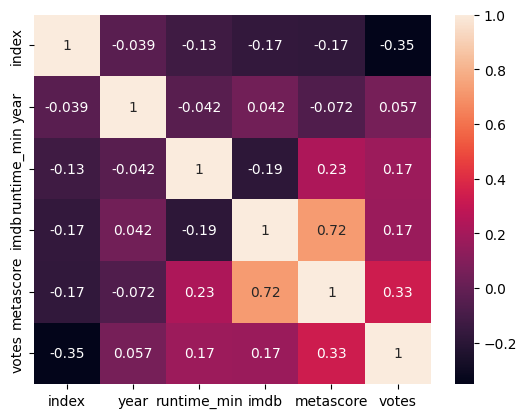

In [108]:

sns.heatmap(data = sci_fi_df.corr(), annot=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

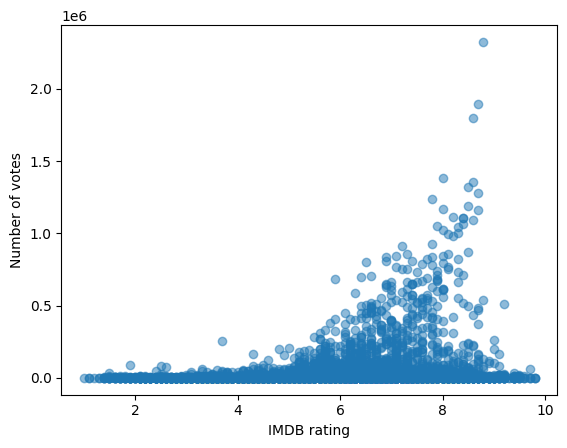

In [109]:
x = sci_fi_df['imdb']
y = sci_fi_df['votes']
plt.scatter(x, y, alpha=0.5)
plt.xlabel("IMDB rating")
plt.ylabel("Number of votes")
plt.show()

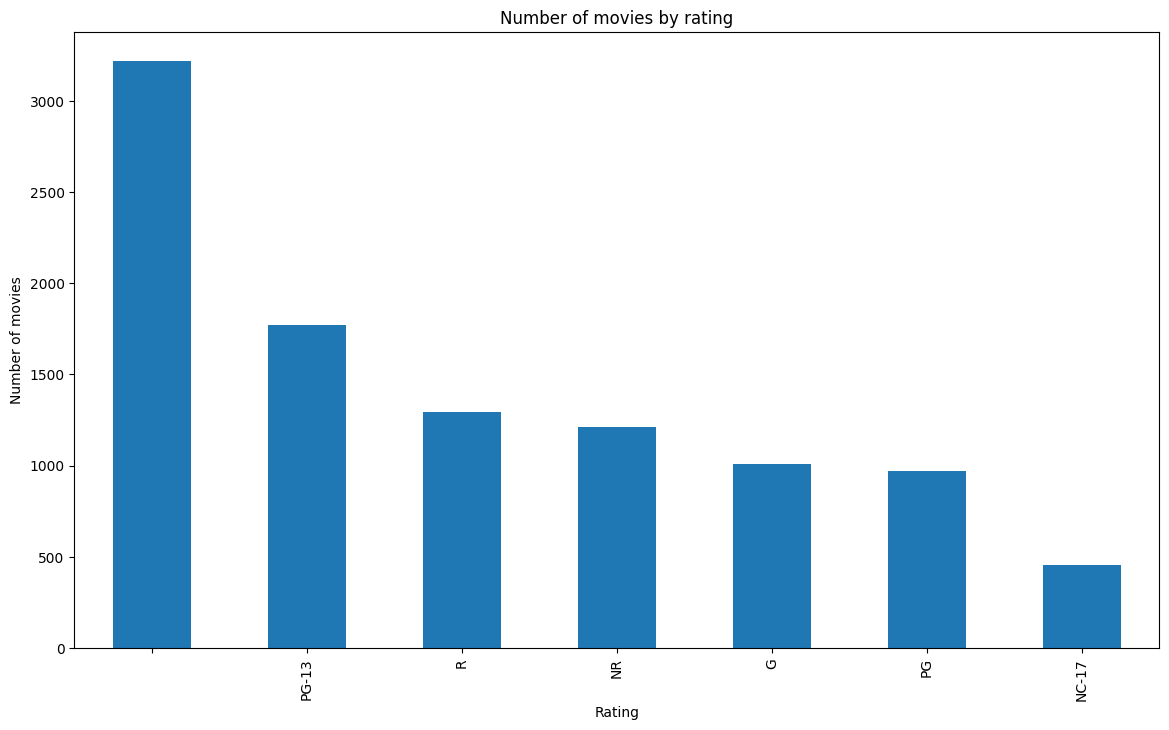

In [110]:
ax = sci_fi_df['rating'].value_counts().plot(kind='bar', figsize=(14, 8), title='Number of movies by rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of movies')
ax.plot();

<AxesSubplot:>

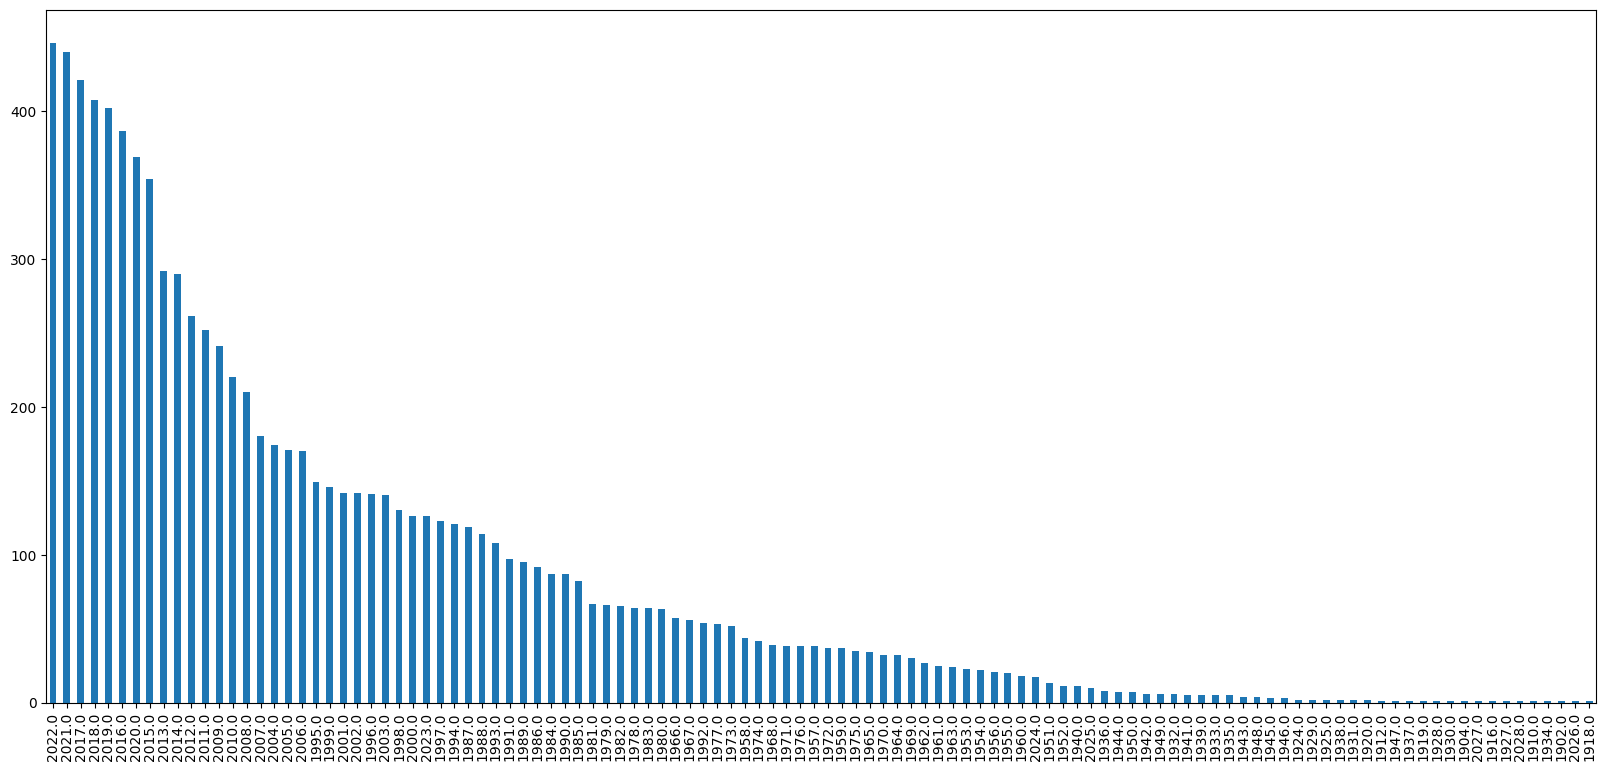

In [111]:
sci_fi_df['year'].value_counts().plot(kind='bar', figsize=[20,9])

[]

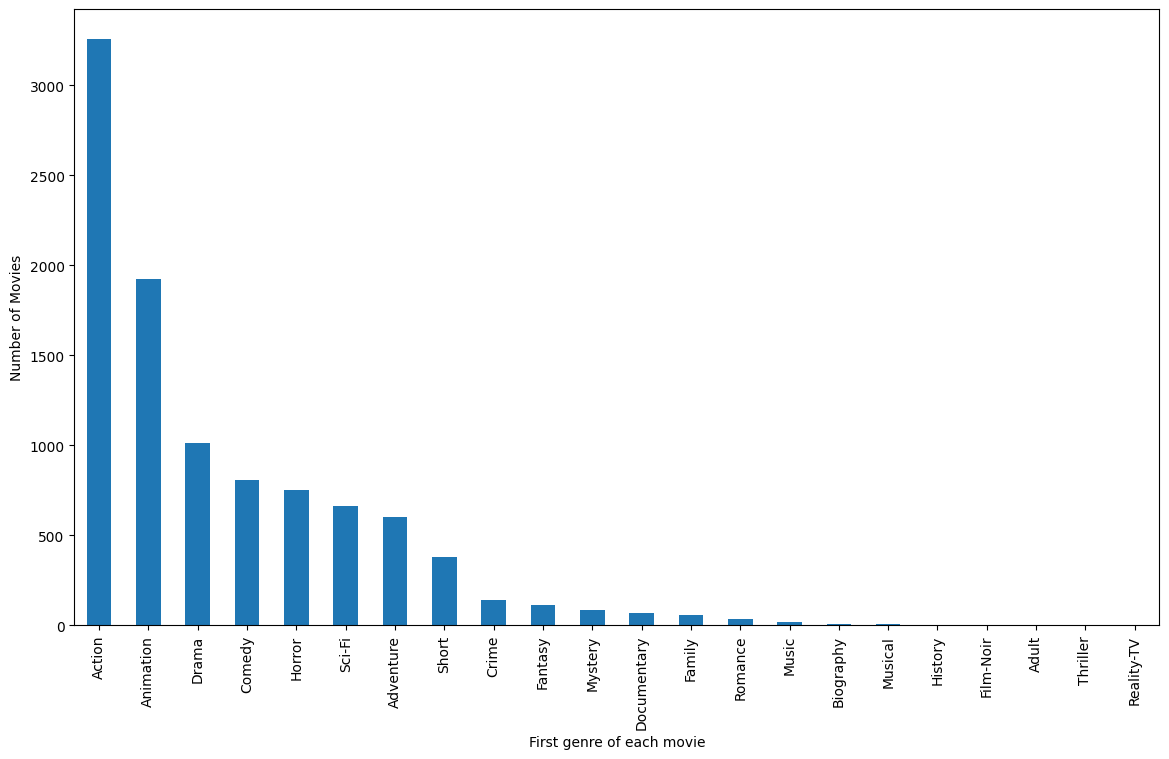

In [117]:
ax = sci_fi_df['first_genre'].value_counts().plot(kind='bar', figsize=(14, 8))
ax.set_xlabel('First genre of each movie')
ax.set_ylabel('Number of Movies')
ax.plot()